In [2]:
import os
import sys
import pandas as pd
import numpy as np
from drawdata import draw_scatter


In [3]:
draw_scatter()

In [29]:
filename = "linear.csv"
raw_data = pd.read_csv(filename)
X = np.around(raw_data['x'], 2)
y = np.around(raw_data['y'], 2)


60.24


In [27]:
from matplotlib import pyplot as plt

In [36]:
class LinearRegression:
    def __init__(self):
        self.bias = np.random.rand()
        self.theta = np.random.rand()
        self.X = None
        self.y = None
    
    def cost(self):
        return np.mean(np.power(self.y - self.X * self.theta - self.bias, 2))
    
    def gradient(self):
        theta_grad = np.mean(-2 * (self.y - self.X * self.theta - self.bias) * self.X)
        bias_grad = np.mean(-2 * (self.y - self.X * self.theta - self.bias))
        return theta_grad, bias_grad
    
    
    def fit(self, X, y, **params):
        lr = params.get("lr")
        tol = params.get("tol")
        epoch = params.get("epoch")
        self.X = X
        self.y = y
        
        for it in range(epoch):
            cost = self.cost()
            if cost <= tol:
                print(f"Convergense reached at epoch {it}. Cost: {cost}")
                return
            else:
                theta_grad, bias_grad = self.gradient()
                self.theta = self.theta - theta_grad * lr
                self.bias = self.bias - bias_grad * lr
                print(f"Epoch: {it}: Cost: {cost}, Bias: {self.bias}, Theta: {self.theta}")
    
    def predict(self, pred_input):
        return pred_input * self.theta + self.bias
    

In [50]:
training_params = {
    "lr": 0.00000001,
    "tol": 0.0,
    "epoch": 1000
}

linear_regression = LinearRegression()
linear_regression.fit(X, y, **training_params)

Epoch: 0: Cost: 6462.75440079128, Bias: 0.058345034107848776, Theta: 0.3845684201938158
Epoch: 1: Cost: 6418.0273334773265, Bias: 0.0583463392567697, Theta: 0.3852352392475817
Epoch: 2: Cost: 6373.649320056462, Bias: 0.05834763907203082, Theta: 0.38589945124870045
Epoch: 3: Cost: 6329.6176364819585, Bias: 0.05834893357448507, Theta: 0.3865610663899293
Epoch: 4: Cost: 6285.929579965793, Bias: 0.05835022278490386, Theta: 0.3872200948241751
Epoch: 5: Cost: 6242.582468812724, Bias: 0.05835150672397738, Theta: 0.3878765466646498
Epoch: 6: Cost: 6199.573642255694, Bias: 0.05835278541231495, Theta: 0.3885304319850261
Epoch: 7: Cost: 6156.900460292505, Bias: 0.05835405887044529, Theta: 0.3891817608195917
Epoch: 8: Cost: 6114.560303523756, Bias: 0.05835532711881687, Theta: 0.3898305431634034
Epoch: 9: Cost: 6072.550572992076, Bias: 0.058356590177798214, Theta: 0.3904767889724403
Epoch: 10: Cost: 6030.8686900225775, Bias: 0.05835784806767821, Theta: 0.39112050816375704
Epoch: 11: Cost: 5989.5120

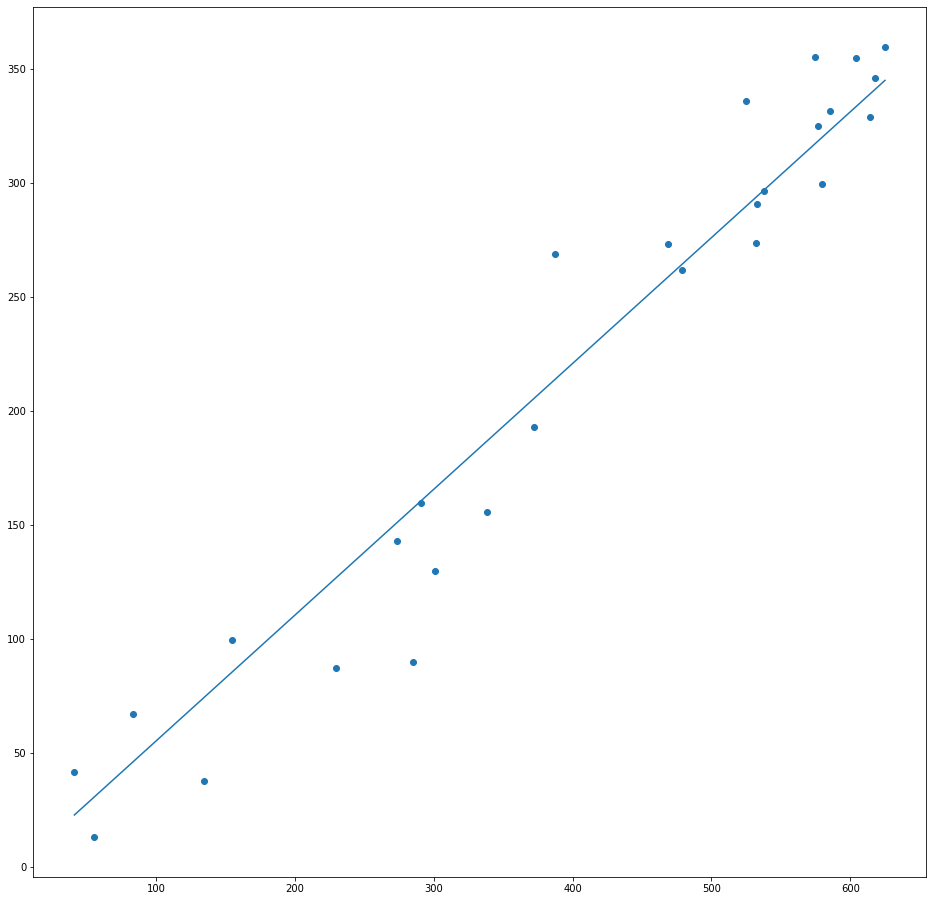

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))

x_min, x_max = np.around(X.min()), np.around(X.max()) 
line_x = np.linspace(x_min, x_max, len(X))
line_y = line_x * linear_regression.theta + linear_regression.bias


ax.plot(line_x, line_y)
ax.scatter(X, y)

In [53]:
linear_regression.predict(np.array([100]))

array([55.23041327])